# Avg. Weighted  Recommendation System

In [1]:
import pandas as pd
import numpy as np

In [2]:
credits_df = pd.read_csv("H:/Machine Learning/Recommendation System/tmdb_5000_credits.csv")
credits_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [3]:
movies_df = pd.read_csv("H:/Machine Learning/Recommendation System/tmdb_5000_movies.csv")
movies_df.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500

In [4]:
print("Credits Dataset Shape :",credits_df.shape)
print("Movies Dataset shape :",movies_df.shape)

Credits Dataset Shape : (4803, 4)
Movies Dataset shape : (4803, 20)


In [5]:
# Merge both the data frames on the basis of ID column 

credit_column_rename = credits_df.rename(columns={"movie_id":"id"} )
movies_df_merge = movies_df.merge(credit_column_rename, on='id')
movies_df_merge.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                         ...                         runtime  \
0                        ...                           162.0   
1                        ...                           169.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                    title_x vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   

                                    title_y  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  

[2 rows x 23 columns]

In [6]:
# remove non required / unnessesory columns

movies_df_clean = movies_df_merge.drop(['homepage', 'title_x','title_y','production_companies'], axis=1)
movies_df_clean.head(2)

budget                                             genres     id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  vote_average  vote_count  \
0                     Enter the World of Pandora.           7.2       11800   
1  At the end of the world, the adventure begins.           6.9        4500   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [7]:
movies_df_clean.info() # check if any null value is there or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 19 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
cast                    4803 non-null object
crew                    4803 non-null object
dtypes: float64(3), int64(4), object(12

## W= (Rv+Cm/v+m) - 
### W = Weighted Rating
### R = Avg. for the movie as no from 0 - 10 (mean) = rating
### v = no of votes from the movie = votes
### m = minimum votes requred to be listed in top 250 (currently 3000)
### C = the Mean vote accross the whole report ( currently 6.9 ) 

### Ref - http://trailerpark.weebly.com/imdb-rating.html?source=post_page---------------------------#

In [8]:
R = movies_df_clean['vote_average']
v = movies_df_clean['vote_count']
C = movies_df_clean['vote_average'].mean()
m = movies_df_clean['vote_count'].quantile(0.70) # movie has min 70% votes then we r going to consider this

In [9]:
movies_df_clean['Weighted_Avg'] = ((R*v)+(C*m))/(v+m)

In [10]:
movies_df_clean.head(2)

budget                                             genres     id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  vote_average  vote_count  \
0                     Enter the World of Pandora.           7.2       11800   
1  At the end of the world, the adventure begins.           6.9        4500   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  Weighted_Avg  
0  [{"credit_id": "52fe48009251416c750aca23", "de...      7.148013  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...      6.807627

In [11]:
movies_sorted_rank = movies_df_clean.sort_values('Weighted_Avg', ascending=False)
movies_sorted_rank[['original_title','vote_count','vote_average','Weighted_Avg','popularity']].head(10)

original_title  vote_count  vote_average  Weighted_Avg  \
1881  The Shawshank Redemption        8205           8.5      8.340775   
3337             The Godfather        5893           8.4      8.192887   
662                 Fight Club        9413           8.3      8.171648   
3232              Pulp Fiction        8428           8.3      8.157615   
65             The Dark Knight       12002           8.2      8.102674   
809               Forrest Gump        7927           8.2      8.056059   
1818          Schindler's List        4329           8.3      8.038748   
3865                  Whiplash        4254           8.3      8.034695   
96                   Inception       13752           8.1      8.018611   
1990   The Empire Strikes Back        5879           8.2      8.010426   

      popularity  
1881  136.747729  
3337  143.659698  
662   146.757391  
3232  121.463076  
65    187.322927  
809   138.133331  
1818  104.469351  
3865  192.528841  
96    167.583710  
1990   78.517830

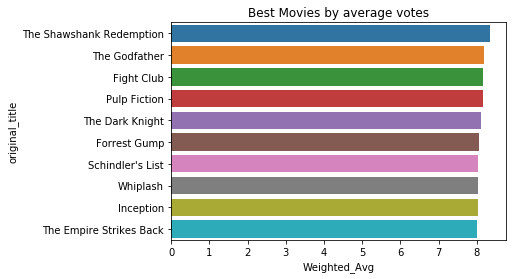

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

w_avg=movies_sorted_rank.sort_values('Weighted_Avg', ascending=False)
sns.barplot(x=movies_sorted_rank['Weighted_Avg'].head(10), y=movies_sorted_rank['original_title'].head(10), data=w_avg)
plt.title('Best Movies by average votes')
plt.show()

In [13]:
popularity=movies_sorted_rank.sort_values('popularity', ascending=False)
popularity.head(2)

budget                                             genres      id  \
546   74000000  [{"id": 10751, "name": "Family"}, {"id": 16, "...  211672   
95   165000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...  157336   

                                              keywords original_language  \
546  [{"id": 3487, "name": "assistant"}, {"id": 179...                en   
95   [{"id": 83, "name": "saving the world"}, {"id"...                en   

    original_title                                           overview  \
546        Minions  Minions Stuart, Kevin and Bob are recruited by...   
95    Interstellar  Interstellar chronicles the adventures of a gr...   

     popularity                               production_countries  \
546  875.581305  [{"iso_3166_1": "US", "name": "United States o...   
95   724.247784  [{"iso_3166_1": "CA", "name": "Canada"}, {"iso...   

    release_date     revenue  runtime  \
546   2015-06-17  1156730962     91.0   
95    2014-11-05   675120017    169.0   

                             spoken_languages    status  \
546  [{"iso_639_1": "en", "name": "English"}]  Released   
95   [{"iso_639_1": "en", "name": "English"}]  Released   

                                               tagline  vote_average  \
546       Before Gru, they had a history of bad bosses           6.4   
95   Mankind was born on Earth. It was never meant ...           8.1   

     vote_count                                               cast  \
546        4571  [{"cast_id": 22, "character": "Scarlet Overkil...   
95        10867  [{"cast_id": 9, "character": "Joseph Cooper", ...   

                                                  crew  Weighted_Avg  
546  [{"credit_id": "5431b2b10e0a2656e20026c7", "de...      6.365286  
95   [{"credit_id": "52fe4bbf9251416c910e4801", "de...      7.998100

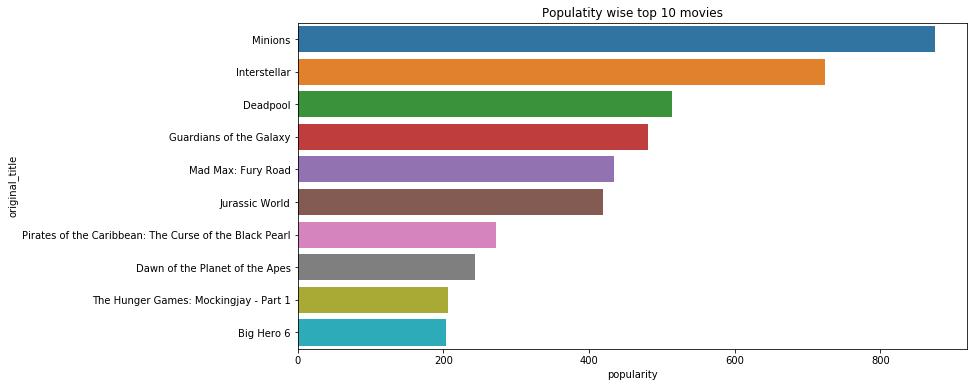

In [15]:
popu = movies_sorted_rank.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popu)
plt.title("Populatity wise top 10 movies")
plt.show()

In [1]:
#We will give priority 50 - 50 % to both weighted avarage and popularity score

# as we can see both columns "Weighted_Avg" and "popularity" both has different magnitude, ex. 8.340775 - 136.747729  respectively
# we will scale down thoes values between 0 - 1 , then we will apply 50 % importance to both. 

In [16]:
from sklearn.preprocessing import MinMaxScaler 

scaling = MinMaxScaler()
movie_scaled_df = scaling.fit_transform(movies_df_clean[['Weighted_Avg', 'popularity']])
movie_normalized_df = pd.DataFrame(movie_scaled_df,columns=['Weighted_Avg', 'popularity'])
movie_normalized_df.head()

Weighted_Avg  popularity
0      0.674339    0.171815
1      0.581403    0.158846
2      0.436273    0.122635
3      0.773054    0.128272
4      0.387739    0.050169

In [17]:
# append both columns in movies_df_clean

movies_df_clean[['Norm_weighted_avg','Norm_popularity']]=movie_normalized_df
movies_df_clean.head(2)

budget                                             genres     id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_countries release_date  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   

        ...                                          spoken_languages  \
0       ...         [{"iso_639_1": "en", "name": "English"}, {"iso...   
1       ...                  [{"iso_639_1": "en", "name": "English"}]   

     status                                         tagline vote_average  \
0  Released                     Enter the World of Pandora.          7.2   
1  Released  At the end of the world, the adventure begins.          6.9   

  vote_count                                               cast  \
0      11800  [{"cast_id": 242, "character": "Jake Sully", "...   
1       4500  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew Weighted_Avg  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...     7.148013   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...     6.807627   

  Norm_weighted_avg  Norm_popularity  
0          0.674339         0.171815  
1          0.581403         0.158846  

[2 rows x 22 columns]

In [19]:
movies_df_clean['Score'] = movies_df_clean['Norm_weighted_avg']*0.5 + movies_df_clean['Norm_popularity']*0.5
movies_df_clean = movies_df_clean.sort_values(['Score'], ascending=False)
movies_df_clean[['original_title','Norm_weighted_avg','Norm_popularity','Score']].head(5)

original_title  Norm_weighted_avg  Norm_popularity     Score
95              Interstellar           0.906439         0.827162  0.866801
546                  Minions           0.460630         1.000000  0.730315
94   Guardians of the Galaxy           0.851874         0.549462  0.700668
788                 Deadpool           0.725217         0.587690  0.656453
127       Mad Max: Fury Road           0.670973         0.495989  0.583481

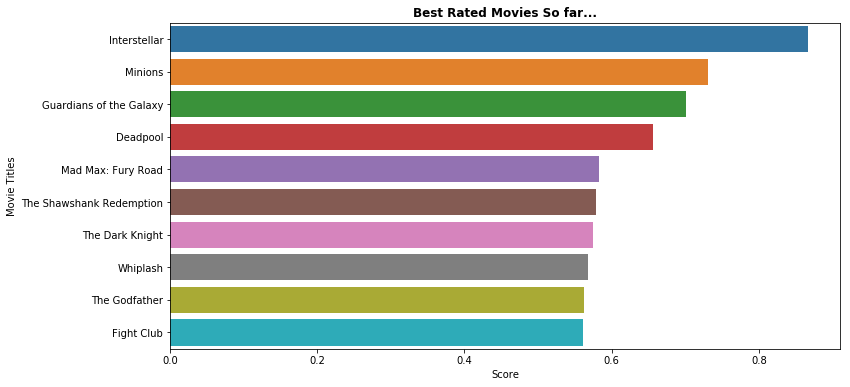

In [22]:
score_df = movies_df_clean.sort_values(['Score'], ascending=False)

plt.figure(figsize=(12,6))

sns.barplot(x=score_df['Score'].head(10), y=score_df['original_title'].head(10), data=score_df)
plt.title("Best Rated Movies So far...", weight='bold')
plt.xlabel("Score")
plt.ylabel("Movie Titles")
plt.show()

<b>Content Based Recommendation System</b>

We are creating recommendations based on the movie’s summaries given in the overview column.

So according to input (movie title) , we will recommend similar movies according to overview.

In [8]:
movies_df_clean.head()['overview']

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies_df_clean['overview'] = movies_df_clean['overview'].fillna('')

In [10]:
tfv_matrix = tfv.fit_transform(movies_df_clean['overview'])

In [11]:
tfv_matrix.data

array([0.30913114, 0.20118856, 0.26104798, ..., 0.16870417, 0.17760458,
       0.17760458])

In [12]:
tfv_matrix.shape

(4803, 10417)

In [13]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [14]:
sig.shape

(4803, 4803)

In [15]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_df_clean.index, index=movies_df_clean['original_title']).drop_duplicates()

In [16]:
indices

original_title
Avatar                                            0
Pirates of the Caribbean: At World's End          1
Spectre                                           2
The Dark Knight Rises                             3
John Carter                                       4
Spider-Man 3                                      5
Tangled                                           6
Avengers: Age of Ultron                           7
Harry Potter and the Half-Blood Prince            8
Batman v Superman: Dawn of Justice                9
Superman Returns                                 10
Quantum of Solace                                11
Pirates of the Caribbean: Dead Man's Chest       12
The Lone Ranger                                  13
Man of Steel                                     14
The Chronicles of Narnia: Prince Caspian         15
The Avengers                                     16
Pirates of the Caribbean: On Stranger Tides      17
Men in Black 3                                   

In [17]:
indices.sort_values(ascending=True).head(10)

original_title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
Spider-Man 3                                5
Tangled                                     6
Avengers: Age of Ultron                     7
Harry Potter and the Half-Blood Prince      8
Batman v Superman: Dawn of Justice          9
dtype: int64

In [46]:
def recommend_movies(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_df_clean['original_title'].iloc[movie_indices]

In [67]:
recommend_movies('From Paris with Love')

IndexError: positional indexers are out-of-bounds

In [48]:
movies_df_clean['recomandation'] = recommend_movies('From Paris with Love')

In [55]:
movies_df_clean=movies_df_clean[movies_df_clean.recomandation.notnull()]

In [63]:
rec_list = movies_df_clean['recomandation'].to_string(index=False)

In [66]:
print(rec_list)

Charlie St. Cloud
                         Rain Man
                  Good Luck Chuck
                        Hit & Run
                 Charlie Bartlett
                          Gun Shy
                The Perfect Match
               Eye of the Dolphin
I Want Someone to Eat Cheese With
               The Young Unknowns
